In [63]:
# Module--1

# Part-1

# Data Acquisition

import pandas as pd

df = pd.read_json('electronics.json', encoding='utf-8')
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


## Data Acquisition

- Downloaded the provided data of Imtiaaz Mall of electronics on google classroom.

- The given data includes:

    - Purchase History (Purchase_Date, Transaction_ID)
    - Product Details (Product_ID)
    - Spending Amounts (Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month)
    - Customer Demographics (Customer_ID, Age, Gender, Income_Level, Address) 
    - Dates of transaction (Purchase_date)

In [64]:
# Part-2 

# Data Cleaning

# Now, converting all of the column's datatypes to ensure consistency in all columns so mean/median can be taken with effective results.

# First targetting all of the numeric columns

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase','Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

categorical_columns = ['Transaction_ID', 'Product_ID', 'Customer_ID','Gender', 'Address', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Income_Level','Season']
df[categorical_columns] = df[categorical_columns].astype('string')

# Converting Purchase_date into date-time format

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')


# Moving towards data cleaning

# Replacing all of the missing values with null

df = df.replace('', np.nan)
df = df.replace('Hidden', np.nan)

#df['Month'].hist(edgecolor='black') 
#checked if median is required for any column

# Cleaning relevant numeric columns

dc_num = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase','Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
df[dc_num] = df[dc_num].fillna(df[dc_num].mean())

# Cleaning relevant categorical columns

dc_cat = ['Gender', 'Income_Level', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Season', 'Year','Purchase_Date']
df[dc_cat] = df[dc_cat].fillna(df[dc_cat].mode().iloc[0])

# Cleaning missing values in Month with median

df['Month'] = df['Month'].fillna(df['Month'].median())

# Round 'Brand_Affinity_Score' column to 2 decimal places
df['Brand_Affinity_Score'] = df['Brand_Affinity_Score'].round(2)


df.dtypes

Customer_ID                              string
Age                                     float64
Gender                                   string
Income_Level                             string
Address                                  string
Transaction_ID                           string
Purchase_Date                    datetime64[ns]
Product_ID                               string
Product_Category                         string
Brand                                    string
Purchase_Amount                         float64
Average_Spending_Per_Purchase           float64
Purchase_Frequency_Per_Month            float64
Brand_Affinity_Score                    float64
Product_Category_Preferences             string
Month                                   float64
Year                                    float64
Season                                   string
dtype: object

In [65]:
df.dtypes

Customer_ID                              string
Age                                     float64
Gender                                   string
Income_Level                             string
Address                                  string
Transaction_ID                           string
Purchase_Date                    datetime64[ns]
Product_ID                               string
Product_Category                         string
Brand                                    string
Purchase_Amount                         float64
Average_Spending_Per_Purchase           float64
Purchase_Frequency_Per_Month            float64
Brand_Affinity_Score                    float64
Product_Category_Preferences             string
Month                                   float64
Year                                    float64
Season                                   string
dtype: object

## Data Cleaning

In Data cleaning:

   - First all the relevant columns were convereted into their relevant data-types.
   - Then all of the cells with string of 0 length were replaced with NULL.
   - Similarly, all of the cells with value 'Hidden' were replaced with NULL.
   - Then all missing values in numeric caloumns were replaced with the mean of specific column.
   - Similarly, missing values in categorical columns were replaced with the mode of specific column.
   - Following these steps, i have cleaned all the data, i didn't replace null values od Address column with anything 
     because to replace address with most occuring address would be in-appropriate.
   - I have not filled or dropped anything in all of the ID columns as to place most occuring IDs would affect data negatively.

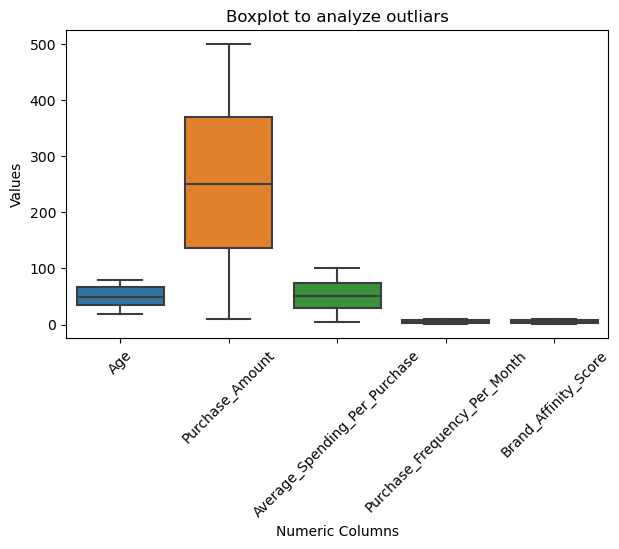

In [83]:
# Analyzing outliars in all of the numeric columnx

import seaborn as sns
import matplotlib.pyplot as plt

dc_num = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
# Create boxplots using Seaborn
plt.figure(figsize=(7, 4)) 
sns.boxplot(data=df[dc_num])
sns.color_palette("rocket", as_cmap=True)
plt.title('Boxplot to analyze outliars')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(ha='center',rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [67]:
# Part-3

# Standardizing columns that follow guassian distribution.

#Only two columns were following guassian distribution so i will standardize them

#from sklearn.preprocessing import StandardScaler

#stnd = ['Purchase_Amount', 'Average_Spending_Per_Purchase']
#scaler = StandardScaler()
#df[stnd] = scaler.fit_transform(df[stnd])

df['Month_Purchase'] = df['Purchase_Date'].dt.to_period('M')
df['Average_Spending_Per_Month'] = df.groupby(['Customer_ID', 'Month_Purchase'])['Purchase_Amount'].transform('mean')

df['Avg_Purchase_Amt_Per_Category'] = df.groupby('Product_Category')['Purchase_Amount'].transform('mean')

df['Avg_Purchase_Amt_Per_Category'].replace(np.nan, df['Avg_Purchase_Amt_Per_Category'].mean(), inplace=True)# Calculate the mean of the 'Avg_Purchase_Amt_Per_Category' column

mean_avg_purchase = df['Average_Spending_Per_Month'].mean()

# Fill NaN values with the mean
df['Average_Spending_Per_Month'].fillna(mean_avg_purchase, inplace=True)
df


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Month_Purchase,Average_Spending_Per_Month,Avg_Purchase_Amt_Per_Category
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974 Amyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,59.0,2.0,2.0,Low,1.0,2010.0,Winter,2022-04,193.000000,258.709129
1,<NA>,25.0,Male,High,<NA>,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,77.0,2.0,1.0,Low,8.0,1989.0,Fall,2021-08,250.903738,254.257705
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555 Johnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,100.0,9.0,1.0,Low,6.0,1995.0,Winter,2021-12,197.000000,242.287294
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809 North Robertville...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,97.0,3.0,4.0,Low,9.0,2012.0,Fall,2022-12,262.000000,258.709129
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320 Davisborough, AR 4...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,85.0,7.0,2.0,High,1.0,2010.0,Summer,2020-06,429.000000,254.257705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<NA>,70.0,Male,Medium,"566 Butler Turnpike Port Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,...,92.0,2.0,5.0,Medium,5.0,1987.0,Fall,2023-03,250.903738,242.287294
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78.0,Female,Low,"45710 Wilson Circles Apt. 411 Walterton, NC 81543",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,...,53.0,3.0,3.0,Medium,9.0,1977.0,Winter,2023-08,176.000000,254.257705
997,562cee08-f909-4e1c-a811-5711f967bea5,63.0,Male,High,"243 Emily Creek South Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-03-01,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,...,99.0,2.0,9.0,Low,12.0,1995.0,Summer,2023-03,212.000000,242.287294
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43.0,Male,High,"1129 Kirby Ferry Suite 743 Billyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,...,98.0,8.0,7.0,Low,3.0,2000.0,Fall,2021-05,250.629863,258.709129


## Module2


------------------------------>Histogram<---------------------------------------------
Skewness of Age =-0.06
Skewness of Purchase_Amount =0.04
Skewness of Purchase_Frequency_Per_Month =0.08


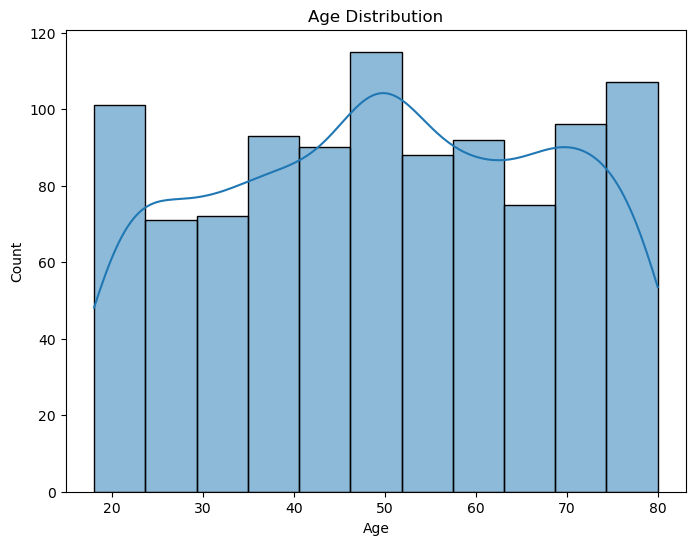

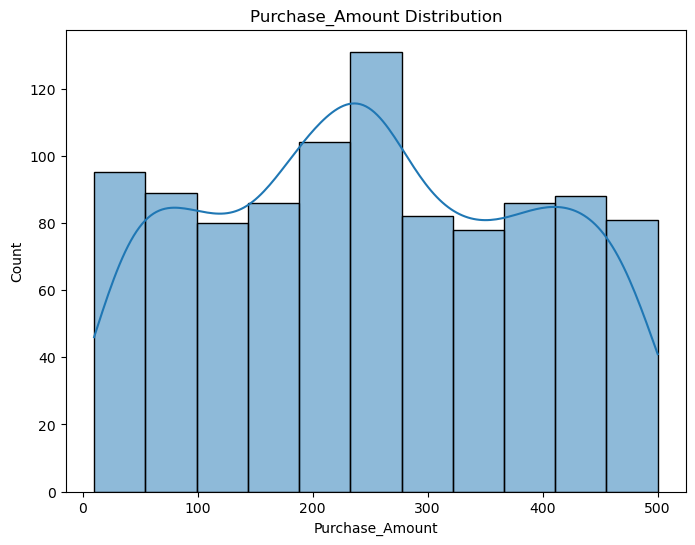

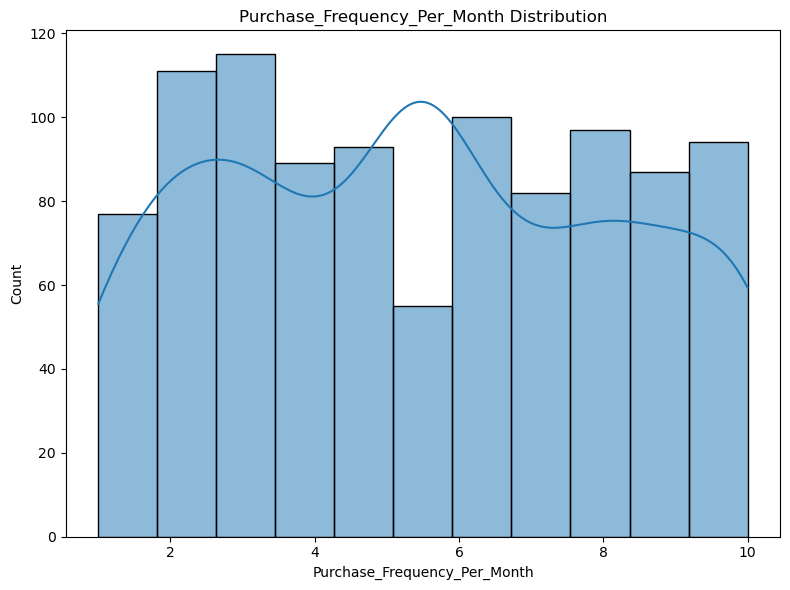

------------------------------>Boxplot<---------------------------------------------


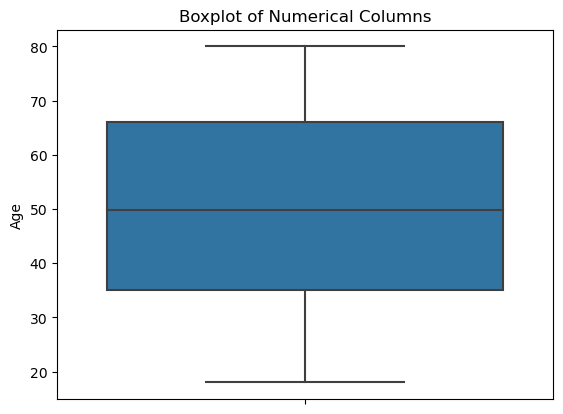

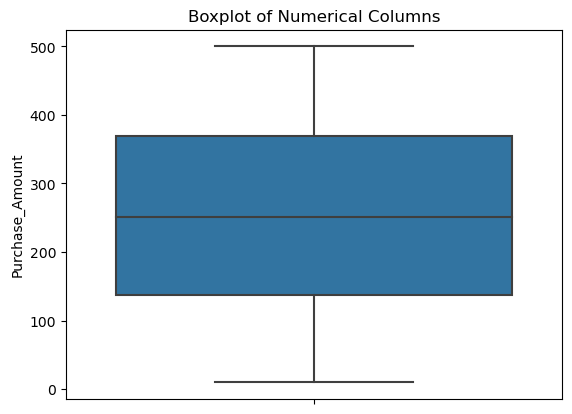

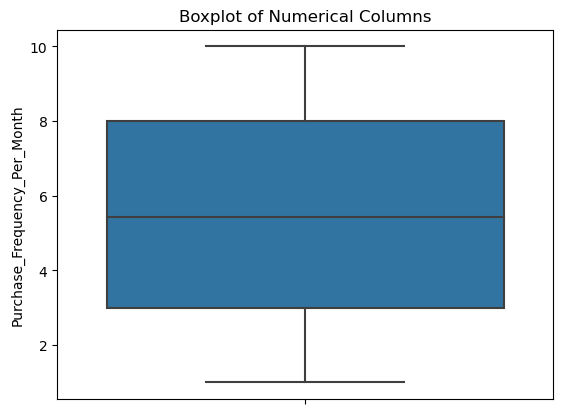

----------------------------->Outliers Data<-----------------------
outliers in Age:
Empty
outliers in Purchase_Amount:
Empty
outliers in Purchase_Frequency_Per_Month:
Empty


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize = 11)
        
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
columns =["Age","Purchase_Amount","Purchase_Frequency_Per_Month"]
print("------------------------------>Histogram<---------------------------------------------")

for col in columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

    # Identify skewness
    skewness = df[col].skew()
    print( f'Skewness of {col} ={skewness:.2f}')
plt.tight_layout()
plt.show()


print("------------------------------>Boxplot<---------------------------------------------")
for col in columns:
    plt.figure()
    plt.title(f'Distribution of {col}')
#     df[[col]].boxplot()
    sns.boxplot(y=df[col])
    plt.title('Boxplot of Numerical Columns')
#     plt.xticks(rotation=45)
    plt.show()




print("----------------------------->Outliers Data<-----------------------")
df2 = df[columns]
# Identify potential outliers using IQR method
for col in columns:
    df2=df2.sort_values(col,ascending=True)
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f'outliers in {col}:')
    if outliers.empty == False:
        print(outliers)
    else:
        print("Empty")

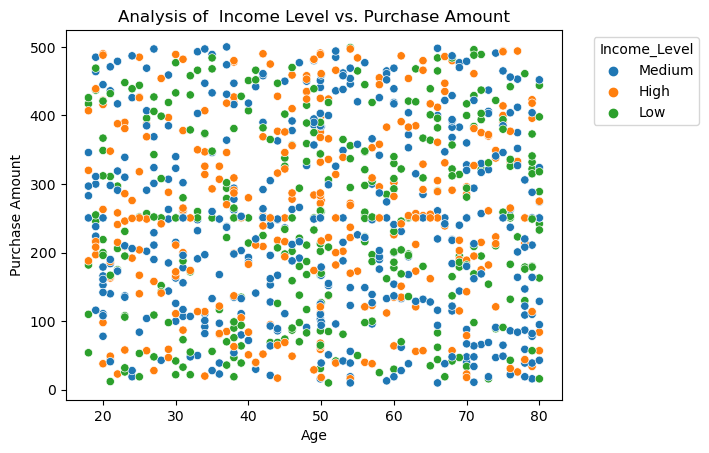

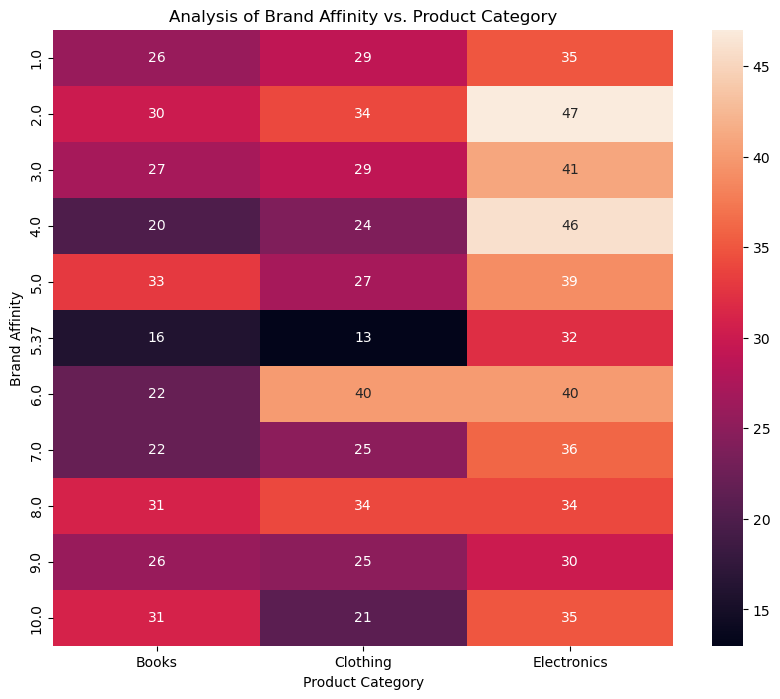

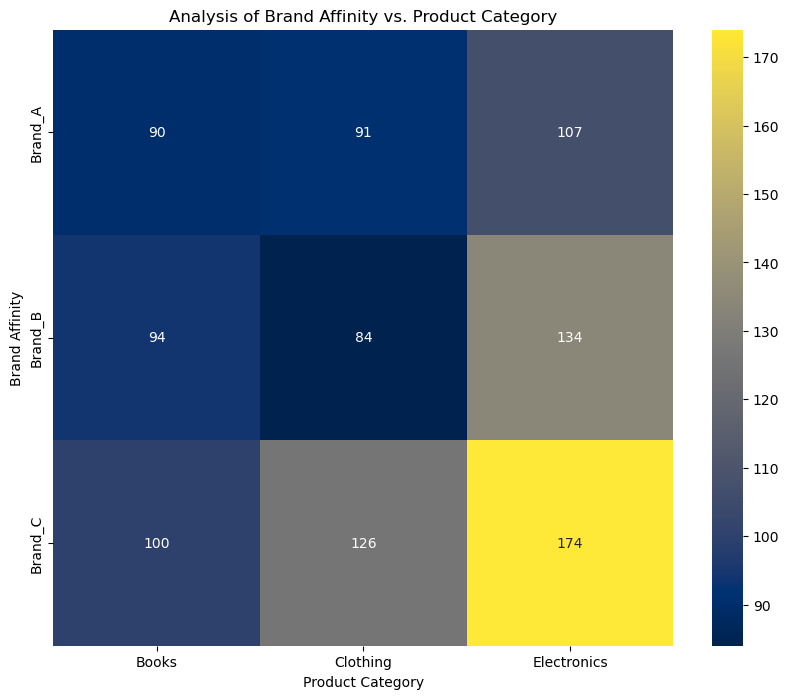

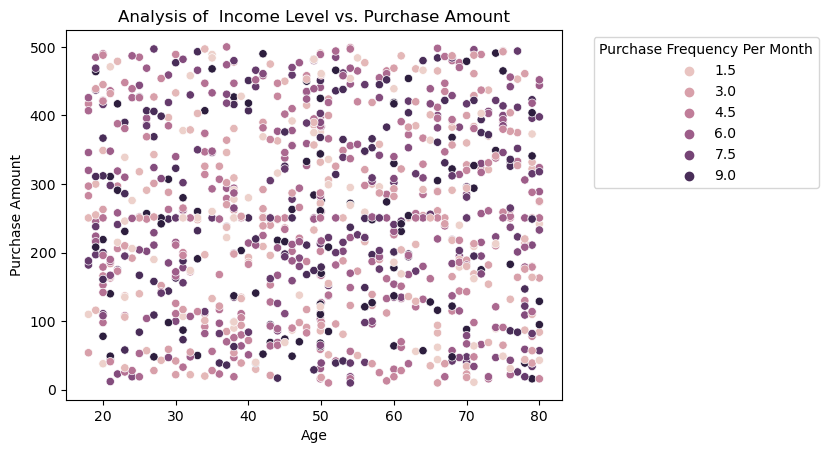

C:\Users\Subhan Arfat\AppData\Local\Temp\ipykernel_2164\3880675610.py:40: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



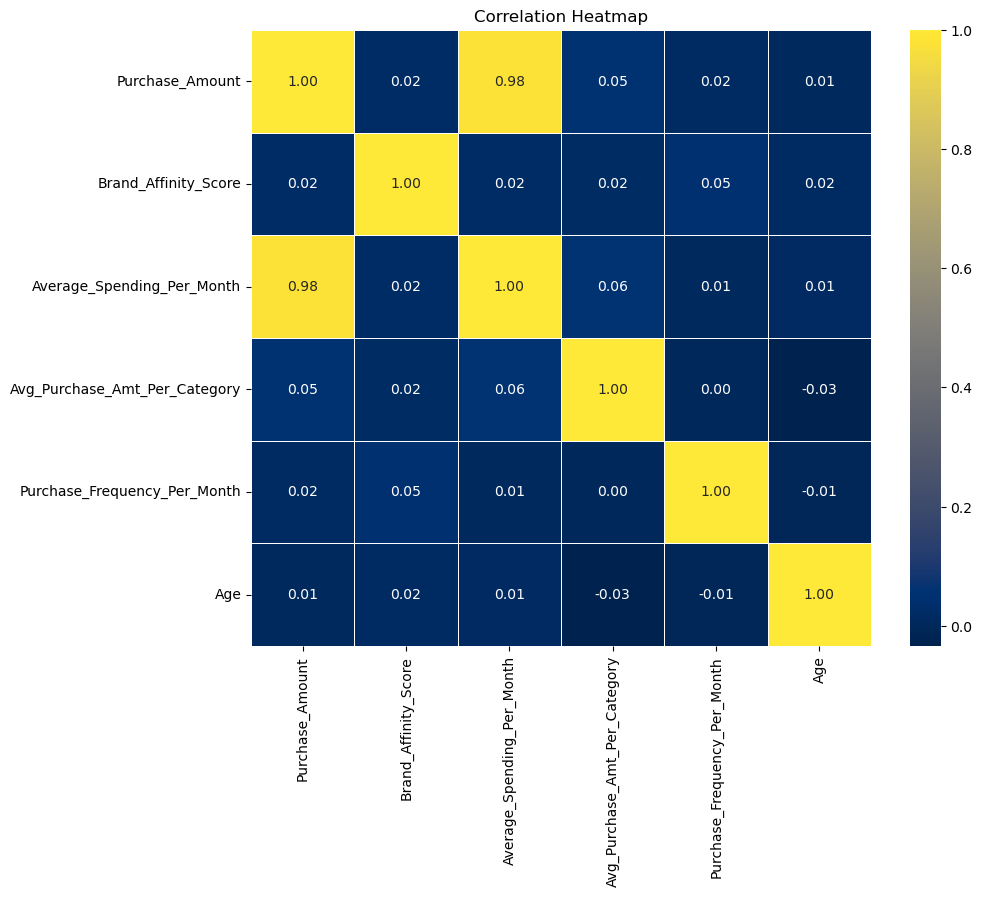

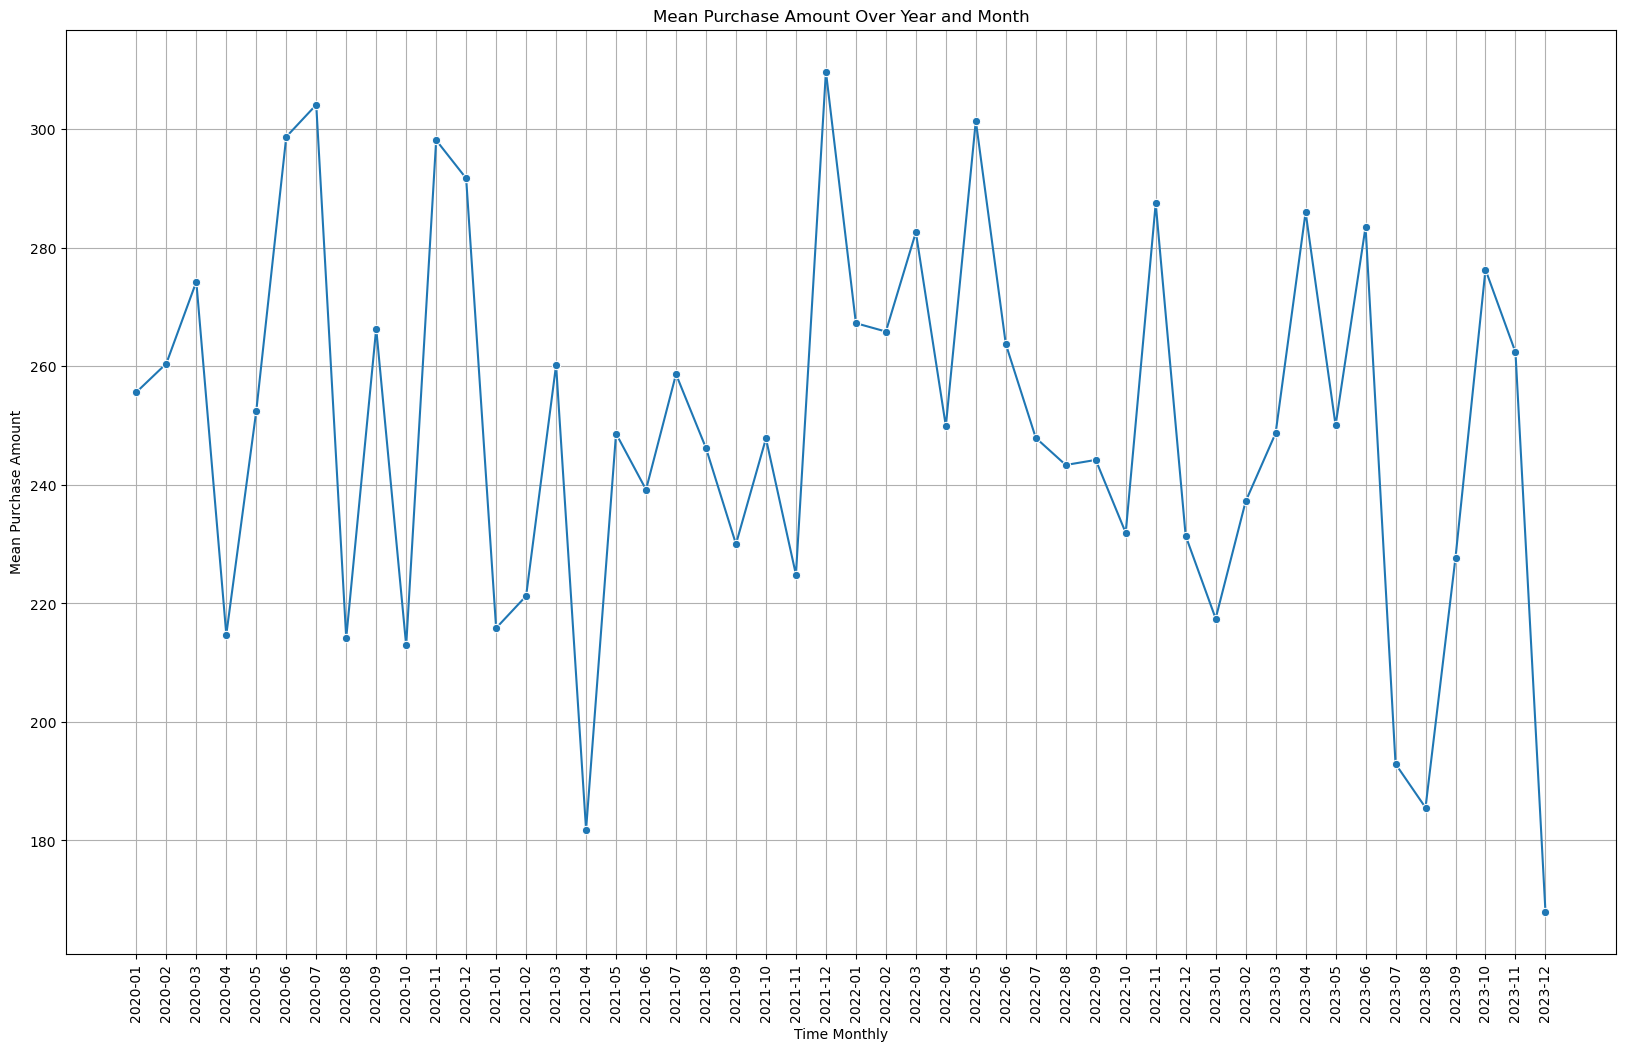

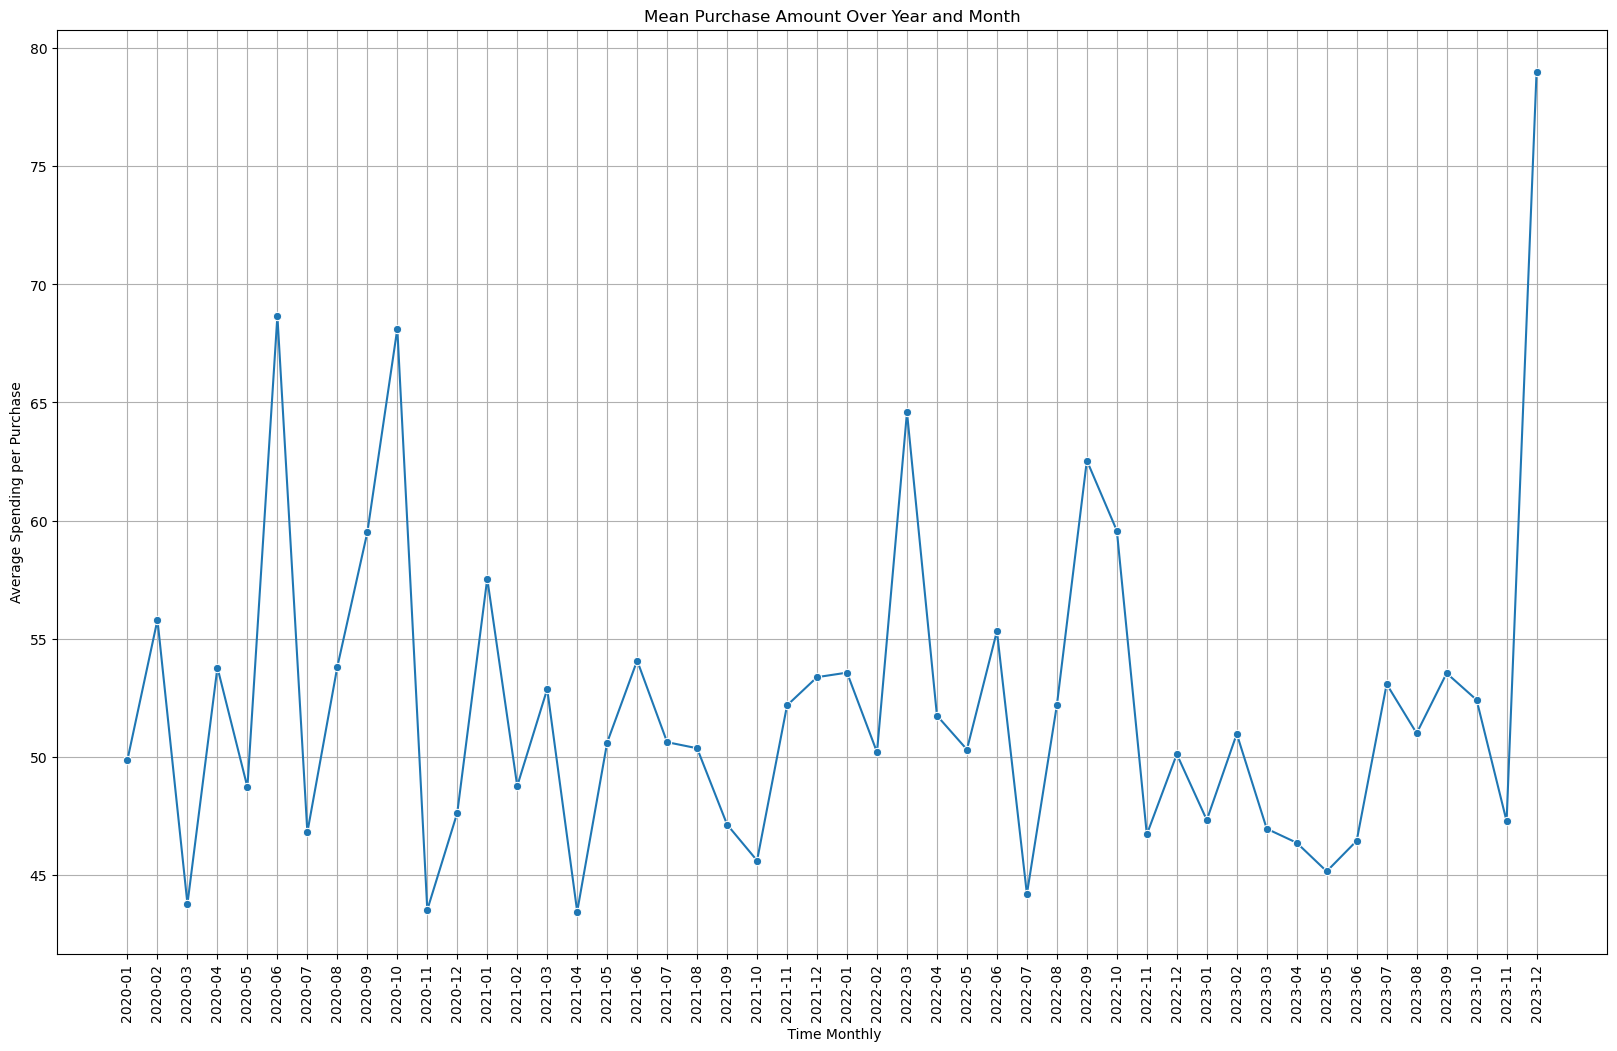

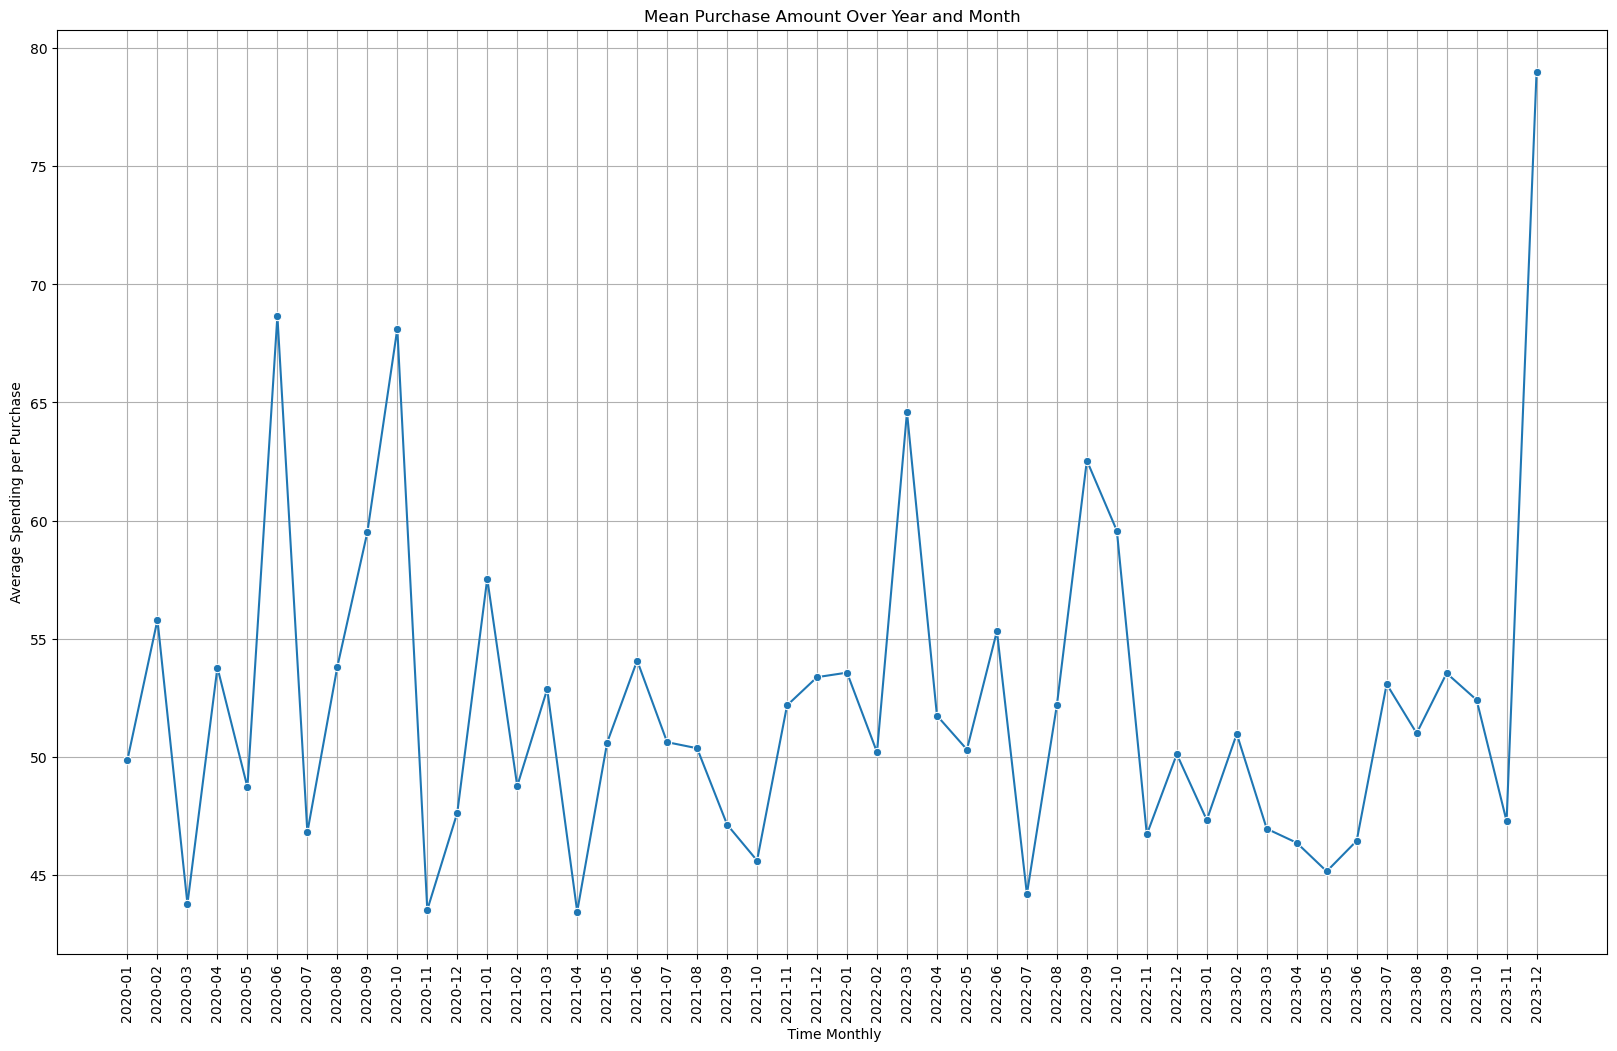

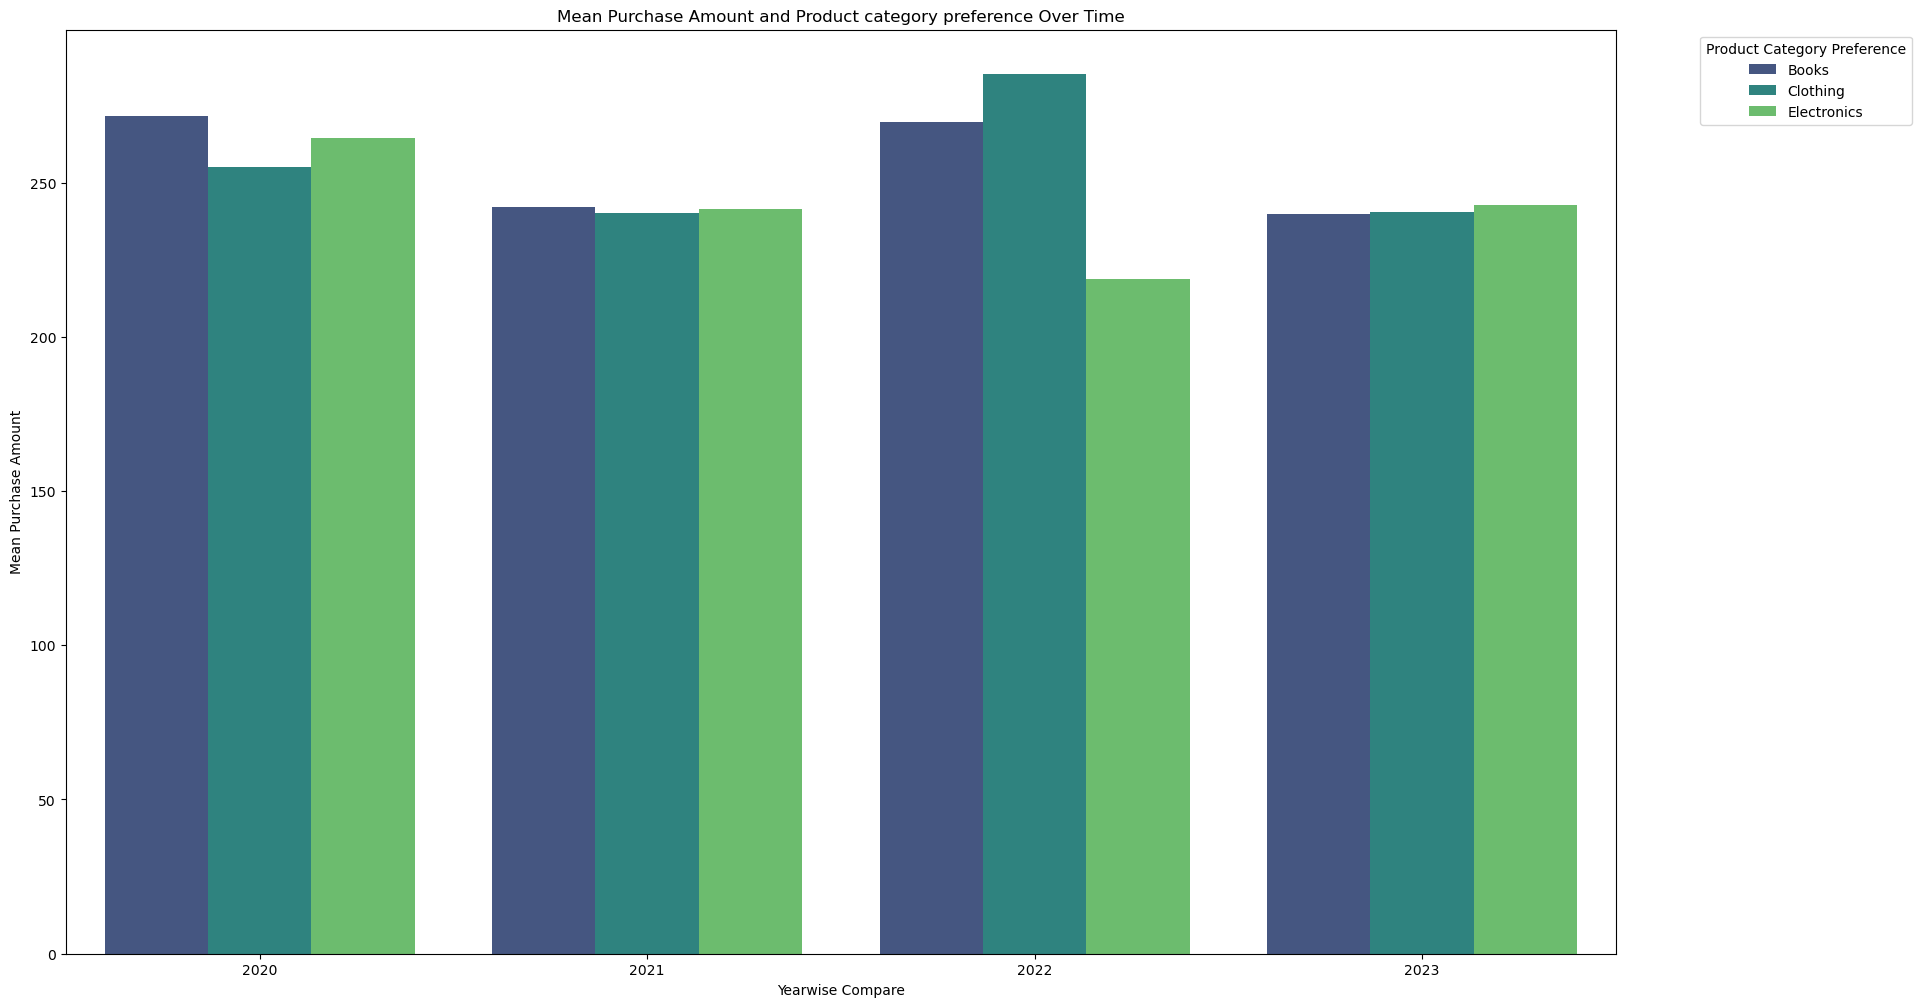

<Figure size 2000x1000 with 0 Axes>

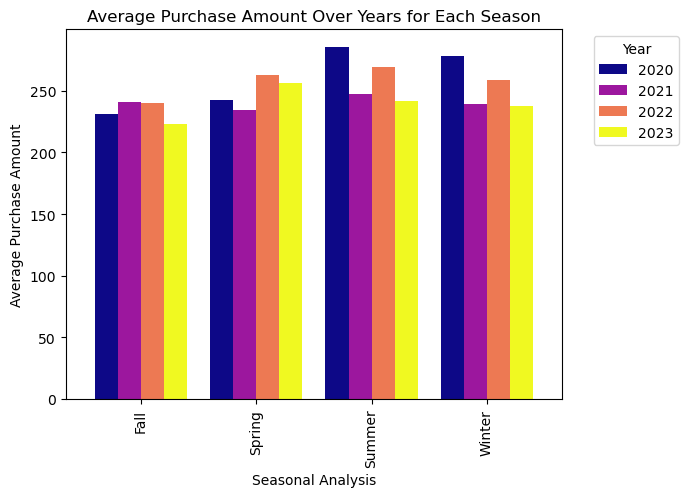

In [69]:

sns.scatterplot(data=df, x="Age", y="Purchase_Amount",hue="Income_Level")
plt.title('Analysis of  Income Level vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Income_Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


df_pivot = df.pivot_table(index='Brand_Affinity_Score', columns='Product_Category', aggfunc='size', fill_value=0)

# Heatmap using the DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, fmt='d')
plt.title('Analysis of Brand Affinity vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity')
plt.show()

df_pivot = df.pivot_table(index='Brand', columns='Product_Category', aggfunc='size', fill_value=0)

# Heatmap using the DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, fmt='d',cmap="cividis")
plt.title('Analysis of Brand Affinity vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity')
plt.show()


sns.scatterplot(data=df, x="Age", y="Purchase_Amount",hue="Purchase_Frequency_Per_Month")
plt.title('Analysis of  Income Level vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Purchase Frequency Per Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# print(f' the correlations of purchase amount by age =  {correlation_matrix}')

correlation_matrix = df[['Purchase_Amount', 'Income_Level', 'Brand_Affinity_Score',"Average_Spending_Per_Month" ,'Avg_Purchase_Amt_Per_Category','Product_Category', 'Purchase_Frequency_Per_Month', 'Age']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Year_Month'] = df['Purchase_Date'].dt.to_period('M')
pivot_table = df.pivot_table(index='Year_Month', values='Purchase_Amount', aggfunc='mean').reset_index()
pivot_table['Year_Month'] = pivot_table['Year_Month'].astype(str)


plt.figure(figsize=(20, 12))
sns.lineplot(data=pivot_table, x='Year_Month', y='Purchase_Amount', marker='o')
plt.title('Mean Purchase Amount Over Year and Month')
plt.xlabel('Time Monthly')
plt.ylabel('Mean Purchase Amount')
plt.xticks(rotation=90)
plt.grid()
plt.show()


df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Year_Month'] = df['Purchase_Date'].dt.to_period('M')
pivot_table = df.pivot_table(index='Year_Month', values='Average_Spending_Per_Purchase', aggfunc='mean').reset_index()
pivot_table['Year_Month'] = pivot_table['Year_Month'].astype(str)


plt.figure(figsize=(20, 12))
sns.lineplot(data=pivot_table, x='Year_Month', y='Average_Spending_Per_Purchase', marker='o')
plt.title('Mean Purchase Amount Over Year and Month')
plt.xlabel(' Time Monthly')
plt.ylabel('Average Spending per Purchase')
plt.xticks(rotation=90)
plt.grid()
plt.show()


df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Year_Month'] = df['Purchase_Date'].dt.to_period('M')
pivot_table = df.pivot_table(index='Year_Month', values='Average_Spending_Per_Purchase', aggfunc='mean').reset_index()
pivot_table['Year_Month'] = pivot_table['Year_Month'].astype(str)


plt.figure(figsize=(20, 12))
sns.lineplot(data=pivot_table, x='Year_Month', y='Average_Spending_Per_Purchase', marker='o')
plt.title('Mean Purchase Amount Over Year and Month')
plt.xlabel(' Time Monthly')
plt.ylabel('Average Spending per Purchase')
plt.xticks(rotation=90)
plt.grid()
plt.show()


df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['new_Month'] = df['Purchase_Date'].dt.month
df['new_Year'] = df['Purchase_Date'].dt.year
pivot_table = df.pivot_table(index=['new_Year', 'Product_Category'], values='Purchase_Amount', aggfunc='mean').reset_index()

# Plotting a bar chart
plt.figure(figsize=(20, 12))
sns.barplot(data=pivot_table, x='new_Year', y='Purchase_Amount', hue='Product_Category', palette='viridis')
plt.title('Mean Purchase Amount and Product category preference Over Time')
plt.xlabel('Yearwise Compare')
plt.ylabel('Mean Purchase Amount')
plt.legend(title='Product Category Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




# Map months to seasons
season_mapping = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Summer', 6: 'Summer',
    7: 'Summer', 8: 'Fall', 9: 'Fall',
    10: 'Fall', 11: 'Winter', 12: 'Winter'
}

# Create 'season_value' column based on 'Purchase_Date'
df['season_value'] = df['Purchase_Date'].dt.month.map(season_mapping)

pivot_table = df.pivot_table(index='season_value', columns=df['Purchase_Date'].dt.year, values='Purchase_Amount', aggfunc='mean')

plt.figure(figsize=(20, 10))
pivot_table.plot(kind="bar", width=0.8, cmap='plasma')
plt.title('Average Purchase Amount Over Years for Each Season')
plt.xlabel('Seasonal Analysis')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Module 3

## K-Means Clustering

In [70]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples


C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

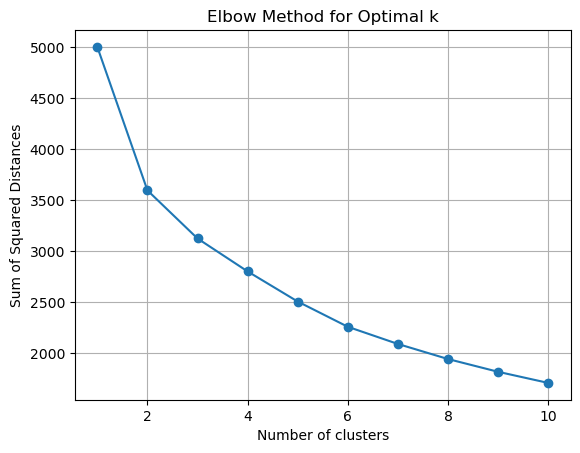

Optimal number of clusters by using the elbow method= 1


In [71]:
quantitaive_data = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',"Purchase_Amount","Age","Average_Spending_Per_Month"]
quantitaive_data_ = df[quantitaive_data]
standardize_quatitative_data = StandardScaler().fit_transform(quantitaive_data_)

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(standardize_quatitative_data)
    distortions.append(kmeans.inertia_)

    # Find the "elbow" point
distortions_np = np.array(distortions)
optimal_cluster = np.argmin(np.gradient(distortions_np)) + 1


# # Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid()
plt.show()
print(f"Optimal number of clusters by using the elbow method= {optimal_cluster}")

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

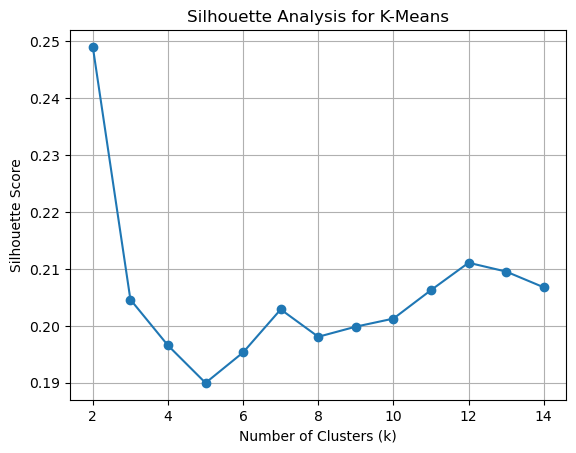

The silhouette score of Kmean clustering = 0.24900730098605198
Optimal number of clusters by using the elbow method= 2


In [72]:
best_silhouette_KMEAN = -1
silhouette = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(standardize_quatitative_data)
    silhouette.append(silhouette_score(standardize_quatitative_data, kmeans.labels_))
    silhouette_KMEAN = silhouette_score(standardize_quatitative_data, kmeans.labels_)
    if silhouette_KMEAN > best_silhouette_KMEAN:
        best_silhouette_KMEAN = silhouette_KMEAN

plt.plot(range(2, 15), silhouette, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.grid()
plt.show()

silhouette_KMEAN=silhouette_score(standardize_quatitative_data, kmeans.labels_)
print(f'The silhouette score of Kmean clustering = {best_silhouette_KMEAN}')
silhouette_np = np.array(silhouette)
optimal_cluster = np.argmin(np.gradient(silhouette_np)) + 2
print(f"Optimal number of clusters by using the elbow method= {optimal_cluster}")

In [73]:
# Create a KMeans model with Manhattan distance
kmeans = KMeans(n_clusters=optimal_cluster,n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(standardize_quatitative_data)
cluster_centers = kmeans.cluster_centers_
manhattan_distances = pairwise_distances(cluster_centers, metric='manhattan')
print("Manhattan Distances between Cluster Centers:")
print(manhattan_distances)


C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Manhattan Distances between Cluster Centers:
[[0.         3.57226028]
 [3.57226028 0.        ]]


C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



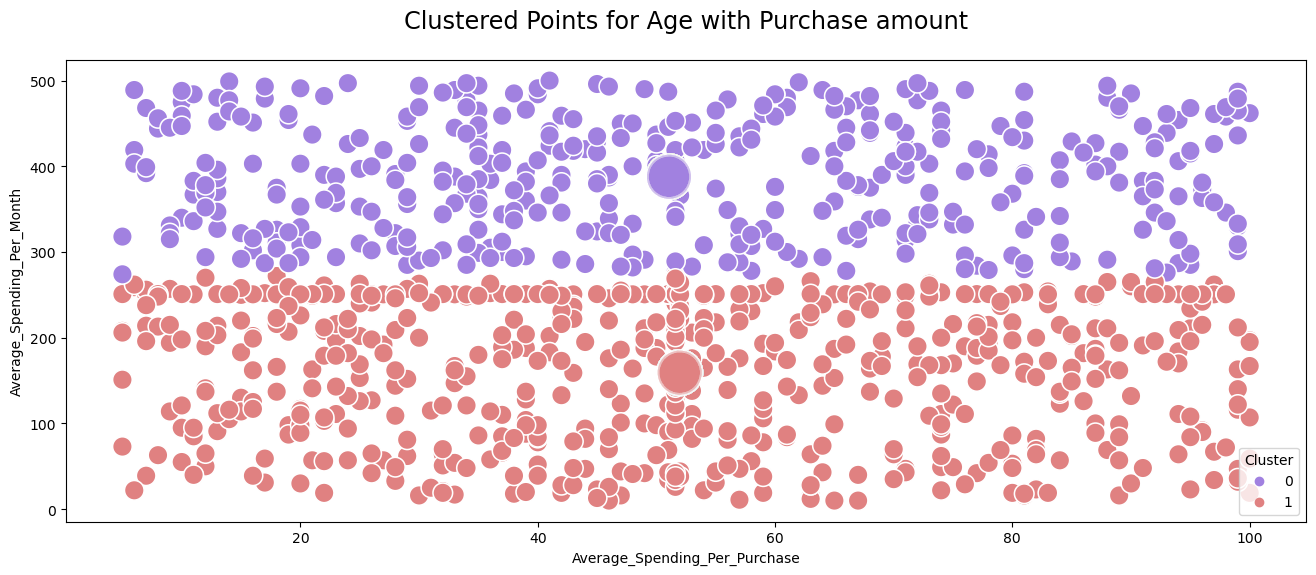

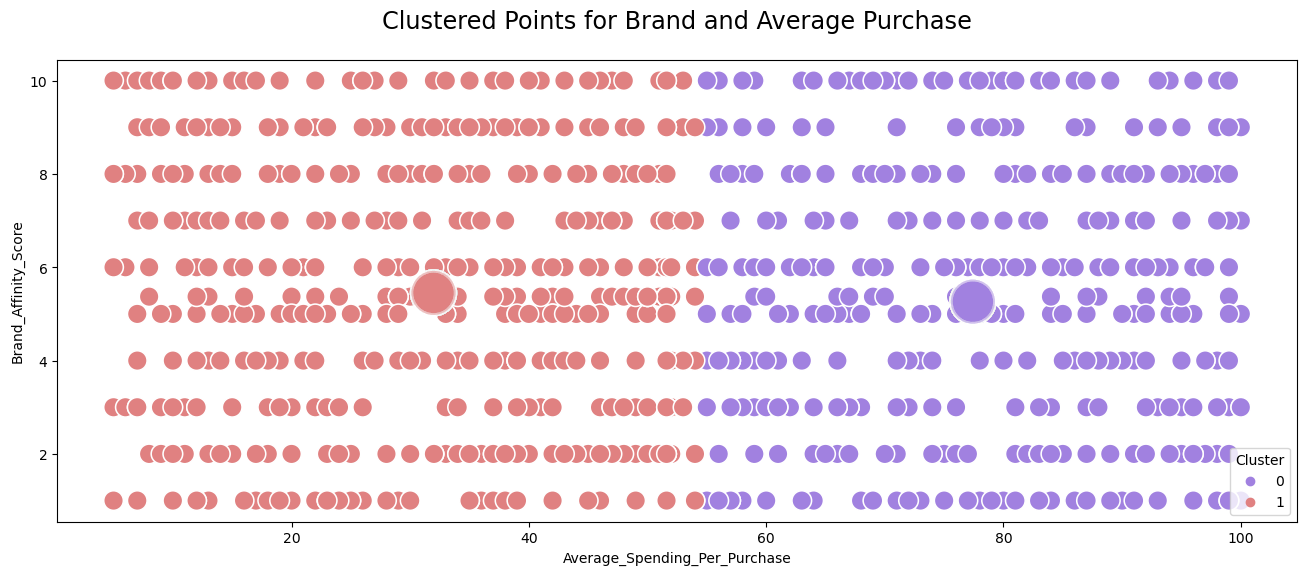

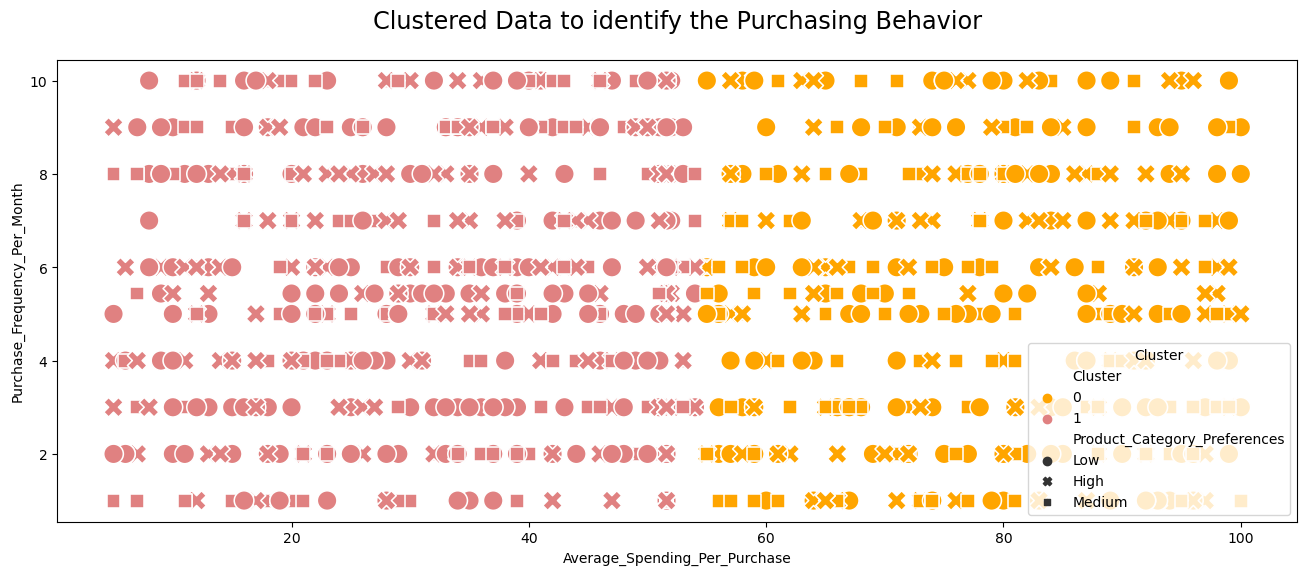

In [74]:
colors = ["#A181E0", "#E08181"]
kms = KMeans(n_clusters=optimal_cluster,n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Average_Spending_Per_Month']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Average_Spending_Per_Month", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points for Age with Purchase amount", fontsize='xx-large', y=1.05);


kms = KMeans(n_clusters=optimal_cluster,n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Brand_Affinity_Score']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Brand_Affinity_Score", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points for Brand and Average Purchase", fontsize='xx-large', y=1.05);


kms = KMeans(n_clusters=optimal_cluster,n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))
colors = ["orange", "#E08181"]
ax1 = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Purchase_Frequency_Per_Month", hue='Cluster', style="Product_Category_Preferences",
                     s=200, palette=colors, legend=True)

plt.legend(loc='lower right', title='Cluster')
ax1.set_title("Clustered Data to identify the Purchasing Behavior", fontsize='xx-large', y=1.05);








## K-Means++ Clustering

In [75]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples


C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

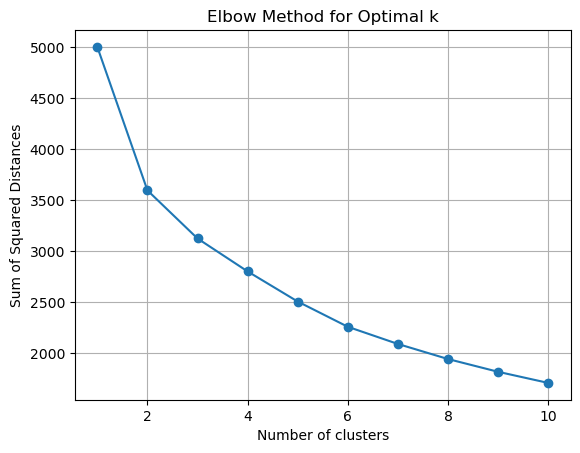

Optimal number of clusters by using the elbow method= 1


In [76]:
quantitaive_data = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',"Purchase_Amount","Age","Average_Spending_Per_Month"]
quantitaive_data_ = df[quantitaive_data]
standardize_quatitative_data = StandardScaler().fit_transform(quantitaive_data_)

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(standardize_quatitative_data)
    distortions.append(kmeans.inertia_)

    # Find the "elbow" point
distortions_np = np.array(distortions)
optimal_cluster = np.argmin(np.gradient(distortions_np)) + 1


# # Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid()
plt.show()
print(f"Optimal number of clusters by using the elbow method= {optimal_cluster}")

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

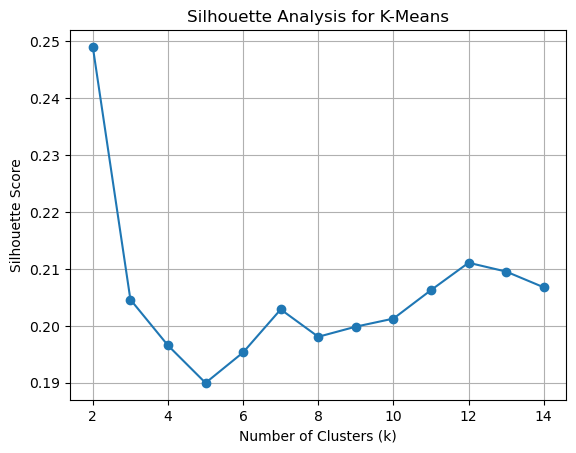

The silhouette score of Kmean clustering = 0.24900730098605198
Optimal number of clusters by using the elbow method= 2


In [77]:
best_silhouette_KMEAN = -1
silhouette = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10, random_state=42)
    kmeans.fit(standardize_quatitative_data)
    silhouette.append(silhouette_score(standardize_quatitative_data, kmeans.labels_))
    silhouette_KMEAN = silhouette_score(standardize_quatitative_data, kmeans.labels_)
    if silhouette_KMEAN > best_silhouette_KMEAN:
        best_silhouette_KMEAN = silhouette_KMEAN

plt.plot(range(2, 15), silhouette, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.grid()
plt.show()

silhouette_KMEAN=silhouette_score(standardize_quatitative_data, kmeans.labels_)
print(f'The silhouette score of Kmean clustering = {best_silhouette_KMEAN}')
silhouette_np = np.array(silhouette)
optimal_cluster = np.argmin(np.gradient(silhouette_np)) + 2
print(f"Optimal number of clusters by using the elbow method= {optimal_cluster}")

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Subhan Arfat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

Manhattan Distances between Cluster Centers:
[[0.         3.57226028]
 [3.57226028 0.        ]]


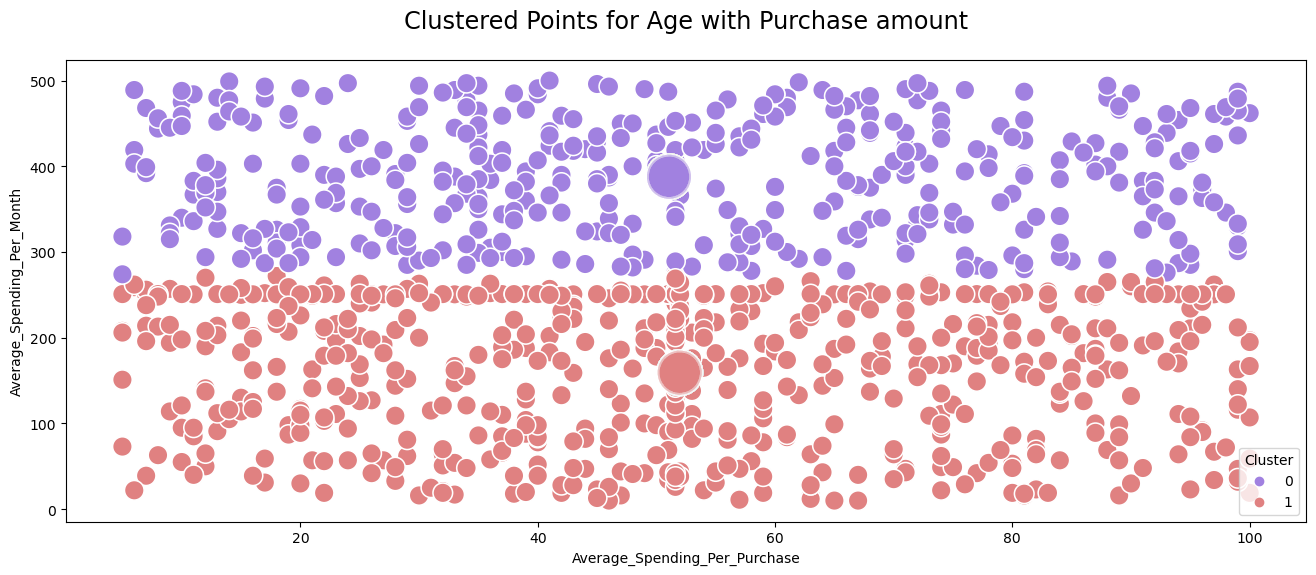

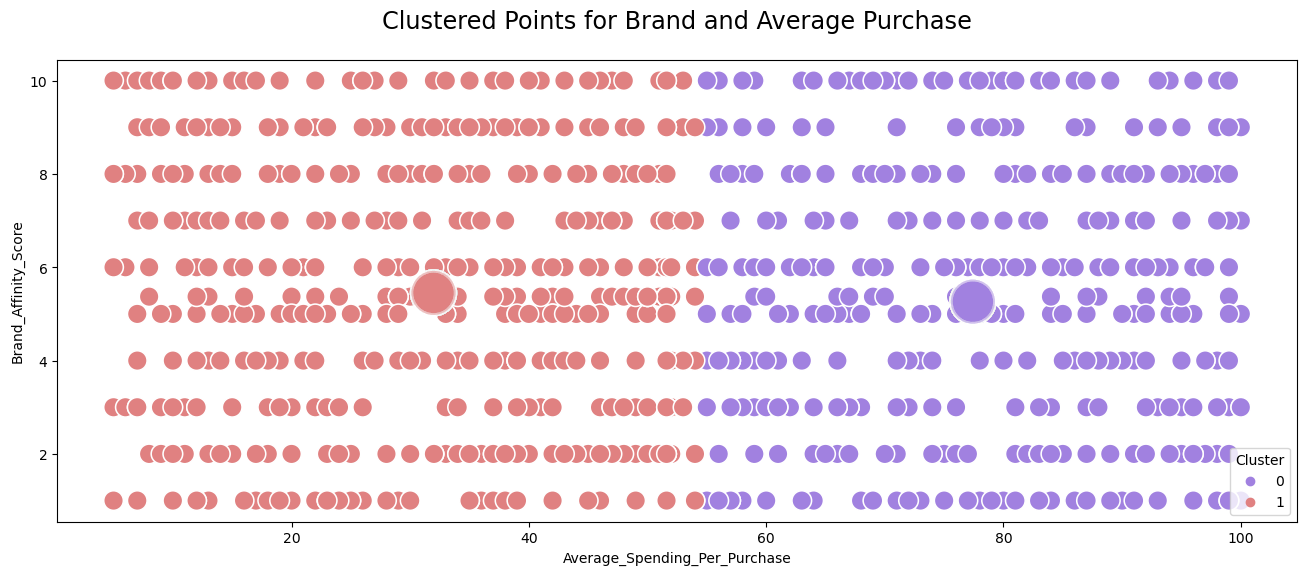

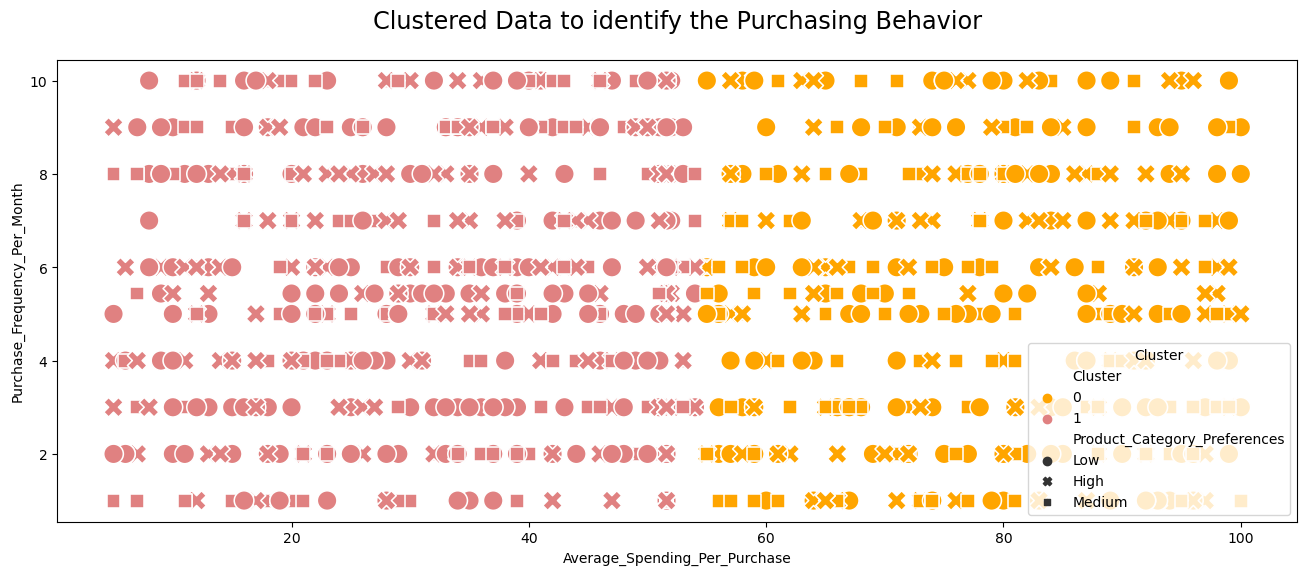

In [78]:
# Define the number of clusters (k):


cluster = optimal_cluster

colors = ["#A181E0", "#E08181"]
kms = KMeans(n_clusters=cluster,init='k-means++',n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Average_Spending_Per_Month']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Average_Spending_Per_Month", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points for Age with Purchase amount", fontsize='xx-large', y=1.05);


kms = KMeans(n_clusters=cluster,init='k-means++',n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Brand_Affinity_Score']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Brand_Affinity_Score", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points for Brand and Average Purchase", fontsize='xx-large', y=1.05);


kms = KMeans(n_clusters=cluster,init='k-means++',n_init=10, random_state=1).fit(df[['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df
plt.figure(figsize=(16, 6))
colors = ["orange", "#E08181"]
ax1 = sns.scatterplot(data=df, x="Average_Spending_Per_Purchase", y="Purchase_Frequency_Per_Month", hue='Cluster', style="Product_Category_Preferences",
                     s=200, palette=colors, legend=True)

plt.legend(loc='lower right', title='Cluster')
ax1.set_title("Clustered Data to identify the Purchasing Behavior", fontsize='xx-large', y=1.05);






# Create a KMeans model with Manhattan distance
kmeans = KMeans(n_clusters=cluster,n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(standardize_quatitative_data)
cluster_centers = kmeans.cluster_centers_
manhattan_distances = pairwise_distances(cluster_centers, metric='manhattan')
print("Manhattan Distances between Cluster Centers:")
print(manhattan_distances)


## DBSCAN Clustering

eps=0.5, min_samples=1, Silhouette Score: 0.10017518189000402
eps=0.5, min_samples=3, Silhouette Score: -0.22567229492440333
eps=0.5, min_samples=5, Silhouette Score: -0.42017681534902124
eps=0.5, min_samples=7, Silhouette Score: -0.1341545436257282
eps=1.0, min_samples=1, Silhouette Score: -0.3414073571348873
eps=1.0, min_samples=3, Silhouette Score: 0.04290405520111213
eps=1.0, min_samples=5, Silhouette Score: 0.037011854035814
eps=1.0, min_samples=7, Silhouette Score: 0.0440811882292265
eps=1.0, min_samples=9, Silhouette Score: 0.05945941739048222

Optimal Parameters - eps: 0.5, min_samples: 1, best_silhouette_score: 0.10017518189000402
-1    943
 2     13
 0      9
 5      9
 6      8
 3      6
 1      6
 4      6
Name: dbscan_cluster, dtype: int64


C:\Users\Subhan Arfat\AppData\Local\Temp\ipykernel_2164\2223018449.py:47: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



                      Age  Purchase_Amount  Average_Spending_Per_Purchase  \
dbscan_cluster                                                              
-1              49.622592       246.912348                      52.688564   
 0              52.085648       456.555556                      40.333333   
 1              71.000000       394.333333                      41.433854   
 2              49.281250       376.230769                      35.507933   
 3              47.166667       369.166667                      15.833333   
 4              70.333333        32.333333                      52.433854   
 5              43.666667       245.876621                      36.777778   
 6              57.235677       225.453733                      13.000000   

                Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
dbscan_cluster                                                                 
-1                                  5.477640              5.334528  6

C:\Users\Subhan Arfat\AppData\Local\Temp\ipykernel_2164\2223018449.py:53: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



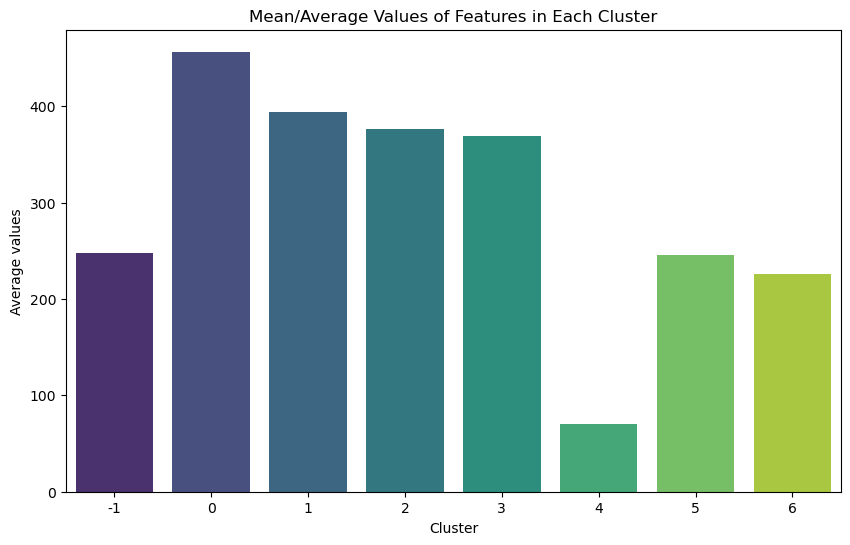

In [79]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the required columns

# Selecting columns for DBSCAN
dbscan_data = df[['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Average_Spending_Per_Month', 'Purchase_Amount', 'Age']]
x = dbscan_data.to_numpy()

# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Optimal eps and minPts
best_silhouette_score = -1
optimal_eps = 0
optimal_min_samples = 0

for eps in [0.5, 1.0, 2.0, 2.5, 3.0]:
    for min_samples in [1, 3, 5, 7, 9]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(x_scaled)
        dbscan_labels = dbscan.labels_

        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(x_scaled, dbscan_labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                optimal_eps = eps
                optimal_min_samples = min_samples

print(f"\nOptimal Parameters - eps: {optimal_eps}, min_samples: {optimal_min_samples}, best_silhouette_score: {best_silhouette_score}")

# Running DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=6).fit(x_scaled)
df['dbscan_cluster'] = dbscan_model.labels_

print(df['dbscan_cluster'].value_counts())

# Computing average feature values in each cluster
cluster_avg_values = df.groupby('dbscan_cluster').mean().reset_index()

# Visualizing clusters
fig = px.scatter(df, x=x_scaled[:,0], y=x_scaled[:,1], color='dbscan_cluster')
fig.show()

dbscan_cluster_characteristics = df.groupby('dbscan_cluster').mean()
print(dbscan_cluster_characteristics)
print('------------------------------------------------------------------------------')


# Count of data points in each cluster
print("Cluster Sizes:")
print(df['dbscan_cluster'].value_counts())
print('------------------------------------------------------------------------------')


# Density of each cluster
cluster_sizes = df['dbscan_cluster'].value_counts()
cluster_densities = {}
for label, count in cluster_sizes.items():
    if label == -1:  # Handling noise points (label -1)
        cluster_densities[label] = "Noise"
    else:
        cluster_densities[label] = count / len(df[df['dbscan_cluster'] == label])

print("\nCluster Densities:")
print(cluster_densities)
print('------------------------------------------------------------------------------')

# Visualizing distribution of clusters in feature space
fig = px.scatter_3d(df, x='Average_Spending_Per_Purchase', y='Purchase_Frequency_Per_Month', z='Purchase_Amount', color='dbscan_cluster', symbol='dbscan_cluster')
fig.update_layout(title='Cluster Distribution in Feature Space')
fig.show()

# Plotting bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_avg_values, x='dbscan_cluster', y='Average_Spending_Per_Purchase', palette='viridis')
sns.barplot(data=cluster_avg_values, x='dbscan_cluster', y='Purchase_Frequency_Per_Month', palette='viridis')
sns.barplot(data=cluster_avg_values, x='dbscan_cluster', y='Age', palette='viridis')
sns.barplot(data=cluster_avg_values, x='dbscan_cluster', y='Purchase_Amount', palette='viridis')
sns.barplot(data=cluster_avg_values, x='dbscan_cluster', y='Average_Spending_Per_Month', palette='viridis')
plt.title('Mean/Average Values of Features in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average values')
plt.show()



In [80]:
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Average_Spending_Per_Month,Avg_Purchase_Amt_Per_Category,Year_Month,new_Month,new_Year,season_value,Cluster,Cluster Centroid D1,Cluster Centroid D2,dbscan_cluster
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974 Amyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,193.000000,258.709129,2022-04,4,2022,Spring,0,77.421296,5.240141,-1
1,<NA>,25.0,Male,High,<NA>,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,250.903738,254.257705,2021-08,8,2021,Fall,0,77.421296,5.240141,-1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555 Johnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,197.000000,242.287294,2021-12,12,2021,Winter,0,77.421296,5.240141,-1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809 North Robertville...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,262.000000,258.709129,2022-12,12,2022,Winter,0,77.421296,5.240141,-1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320 Davisborough, AR 4...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,429.000000,254.257705,2020-06,6,2020,Summer,0,77.421296,5.240141,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<NA>,70.0,Male,Medium,"566 Butler Turnpike Port Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,...,250.903738,242.287294,2023-03,3,2023,Spring,0,77.421296,5.240141,-1
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78.0,Female,Low,"45710 Wilson Circles Apt. 411 Walterton, NC 81543",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,...,176.000000,254.257705,2023-08,8,2023,Fall,1,31.966769,5.586789,-1
997,562cee08-f909-4e1c-a811-5711f967bea5,63.0,Male,High,"243 Emily Creek South Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-03-01,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,...,212.000000,242.287294,2023-03,3,2023,Spring,0,77.421296,5.240141,-1
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43.0,Male,High,"1129 Kirby Ferry Suite 743 Billyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,...,250.629863,258.709129,2021-05,5,2021,Summer,0,77.421296,5.240141,-1


## Module 4

In [82]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(dbscan_data, df['Cluster'])
kmeans_calinski_harabasz = calinski_harabasz_score(dbscan_data, df['Cluster'])
kmeans_davies_bouldin = davies_bouldin_score(dbscan_data, df['Cluster'])

# Evaluate DBSCAN clustering (use numeric version of 'DBSCAN_Cluster')
dbscan_silhouette = silhouette_score(dbscan_data, df['dbscan_cluster'])
dbscan_calinski_harabasz = calinski_harabasz_score(dbscan_data, df['dbscan_cluster'])
dbscan_davies_bouldin = davies_bouldin_score(dbscan_data, df['dbscan_cluster'])

# Evaluate K-Means++ clustering (use numeric version of 'KMeans++_Cluster')
kmeans_pp_silhouette = silhouette_score(dbscan_data, df['Cluster'])
kmeans_pp_calinski_harabasz = calinski_harabasz_score(dbscan_data, df['Cluster'])
kmeans_pp_davies_bouldin = davies_bouldin_score(dbscan_data, df['Cluster'])

# Print and compare the metrics
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette}")
print(f"Calinski-Harabasz Score for K-Means Clustering: {kmeans_calinski_harabasz}")
print(f"Davies-Bouldin Index for K-Means Clustering: {kmeans_davies_bouldin}\n")

print(f"Silhouette Score for DBSCAN Clustering: {dbscan_silhouette}")
print(f"Calinski-Harabasz Score for DBSCAN Clustering: {dbscan_calinski_harabasz}")
print(f"Davies-Bouldin Index for DBSCAN Clustering: {dbscan_davies_bouldin}\n")

print(f"Silhouette Score for K-Means++ Clustering: {kmeans_pp_silhouette}")
print(f"Calinski-Harabasz Score for K-Means++ Clustering: {kmeans_pp_calinski_harabasz}")
print(f"Davies-Bouldin Index for K-Means++ Clustering: {kmeans_pp_davies_bouldin}")

Silhouette Score for K-Means Clustering: 0.03326499218535305
Calinski-Harabasz Score for K-Means Clustering: 13.683537926826611
Davies-Bouldin Index for K-Means Clustering: 7.230089065332304

Silhouette Score for DBSCAN Clustering: -0.6309963924630283
Calinski-Harabasz Score for DBSCAN Clustering: 8.840340366926815
Davies-Bouldin Index for DBSCAN Clustering: 4.061674740363794

Silhouette Score for K-Means++ Clustering: 0.03326499218535305
Calinski-Harabasz Score for K-Means++ Clustering: 13.683537926826611
Davies-Bouldin Index for K-Means++ Clustering: 7.230089065332304
